---

## Supermarket Customer segmentation
Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. It can be employed by all types of business, regardless of size, industry and whether they sell online or in person. For example, a small business selling guitars might decide to promote lower-priced products to younger guitarists and higher-priced premium guitars to older musicians based on segment knowledge which tells them that younger musicians have less disposable income than their older counterparts.  

The analysis is based on a dataset on 4,000 customers that has been collected through loyalty cards that customers use at checkout, and includes variables such as customer age, gender, annual income, etc.

The report starts with exploratory data analysis to highlight key statistics and trends using charts like histograms and pie charts. 

Next, customer segmentation is conducted by standardizing numerical variables and determining the optimal number of clusters using the Elbow Method and Silhouette Plots. Clustering is performed using both K-means++ and Agglomerative Clustering, with cluster centers and sizes reported. Each cluster is profiled based on customer characteristics, and the two methods are compared for similarities. Based on the K-means++ results, marketing strategies are suggested for each segment. 



---


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/assignment_dataset.csv')


In [2]:
df.isnull().sum()

Gender             0
Marital Status     0
Education          0
Settlement Size    0
Occupation         0
Income             0
Age                0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           4000 non-null   int64
 1   Marital Status   4000 non-null   int64
 2   Education        4000 non-null   int64
 3   Settlement Size  4000 non-null   int64
 4   Occupation       4000 non-null   int64
 5   Income           4000 non-null   int64
 6   Age              4000 non-null   int64
dtypes: int64(7)
memory usage: 218.9 KB


In [4]:
df.head()

,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age
0,0,0,3,2,2,185611,50
1,0,1,1,0,1,114778,30
2,0,1,1,0,0,132788,34
3,0,1,3,2,2,209671,55
4,1,1,1,2,1,118593,44


In [5]:
df.describe().round()

,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age
count,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0
mean,0.0,1.0,2.0,1.0,1.0,134354.0,40.0
std,0.0,0.0,1.0,1.0,1.0,48534.0,10.0
min,0.0,0.0,0.0,0.0,0.0,35832.0,18.0
25%,0.0,0.0,1.0,0.0,1.0,97815.0,32.0
50%,0.0,1.0,1.0,1.0,1.0,122607.0,38.0
75%,1.0,1.0,3.0,2.0,2.0,165920.0,47.0
max,1.0,1.0,3.0,2.0,2.0,309364.0,76.0


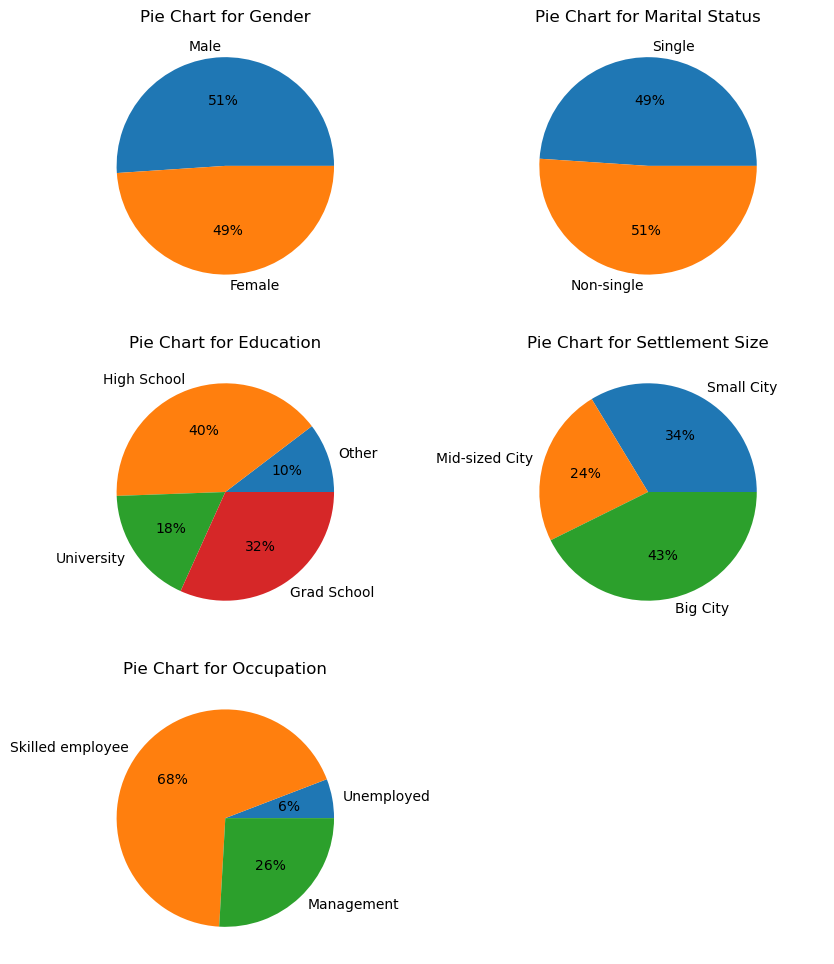

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))  

# Define labels for the charts
gender_labels = {0: 'Male', 1: 'Female'}
marital_status_labels = {0: 'Single', 1: 'Non-single'}
education_labels = {0: 'Other', 1: 'High School', 2: 'University', 3: 'Grad School'}
occupation_labels = {0: 'Unemployed', 1: 'Skilled employee', 2: 'Management'}
settlement_size_labels = {0: 'Small City', 1: 'Mid-sized City', 2: 'Big City'}

# Gender Pie Chart
gender_counts = df['Gender'].value_counts().reindex(gender_labels.keys(), fill_value=0)
axes[0,0].pie(gender_counts, labels=[gender_labels[idx] for idx in gender_counts.index], autopct='%1.0f%%')
axes[0,0].set_title('Pie Chart for Gender')

# Marital Status Pie Chart
marital_counts = df['Marital Status'].value_counts().reindex(marital_status_labels.keys(), fill_value=0)
axes[0,1].pie(marital_counts, labels=[marital_status_labels[idx] for idx in marital_counts.index], autopct='%1.0f%%')
axes[0,1].set_title('Pie Chart for Marital Status')

# Education Pie Chart
education_counts = df['Education'].value_counts().reindex(education_labels.keys(), fill_value=0)
axes[1,0].pie(education_counts, labels=education_counts.index.map(education_labels), autopct='%1.0f%%')
axes[1,0].set_title('Pie Chart for Education')

# Settlement Size Pie Chart
settlement_counts = df['Settlement Size'].value_counts().reindex(settlement_size_labels.keys(), fill_value=0)
axes[1, 1].pie(settlement_counts, labels=settlement_counts.index.map(settlement_size_labels), autopct='%1.0f%%')
axes[1, 1].set_title('Pie Chart for Settlement Size')

# Occupation Pie Chart
occupation_counts = df['Occupation'].value_counts().reindex(occupation_labels.keys(), fill_value=0)
axes[2, 0].pie(occupation_counts, labels=occupation_counts.index.map(occupation_labels), autopct='%1.0f%%')
axes[2, 0].set_title('Pie Chart for Occupation')

axes[2, 1].axis('off')

# Display the plot
plt.show()

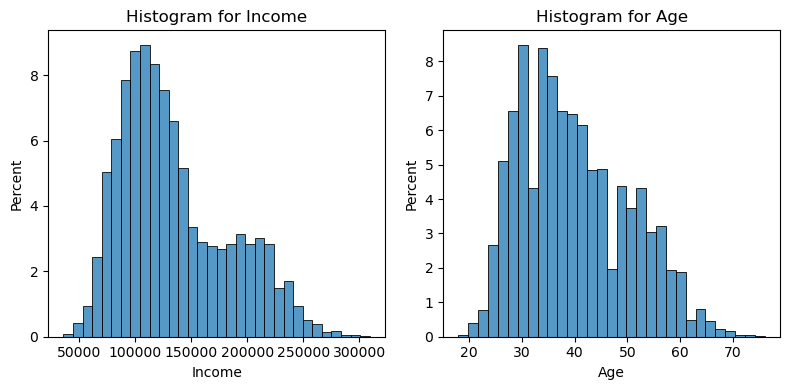

In [7]:
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))  

sns.histplot(data=df, x='Income', stat='percent',ax=axes[0])  
axes[0].set_title('Histogram for Income')

sns.histplot(data=df, x='Age', stat='percent', ax=axes[1])  
axes[1].set_title('Histogram for Age')
# Display the plot
plt.tight_layout()
plt.show()

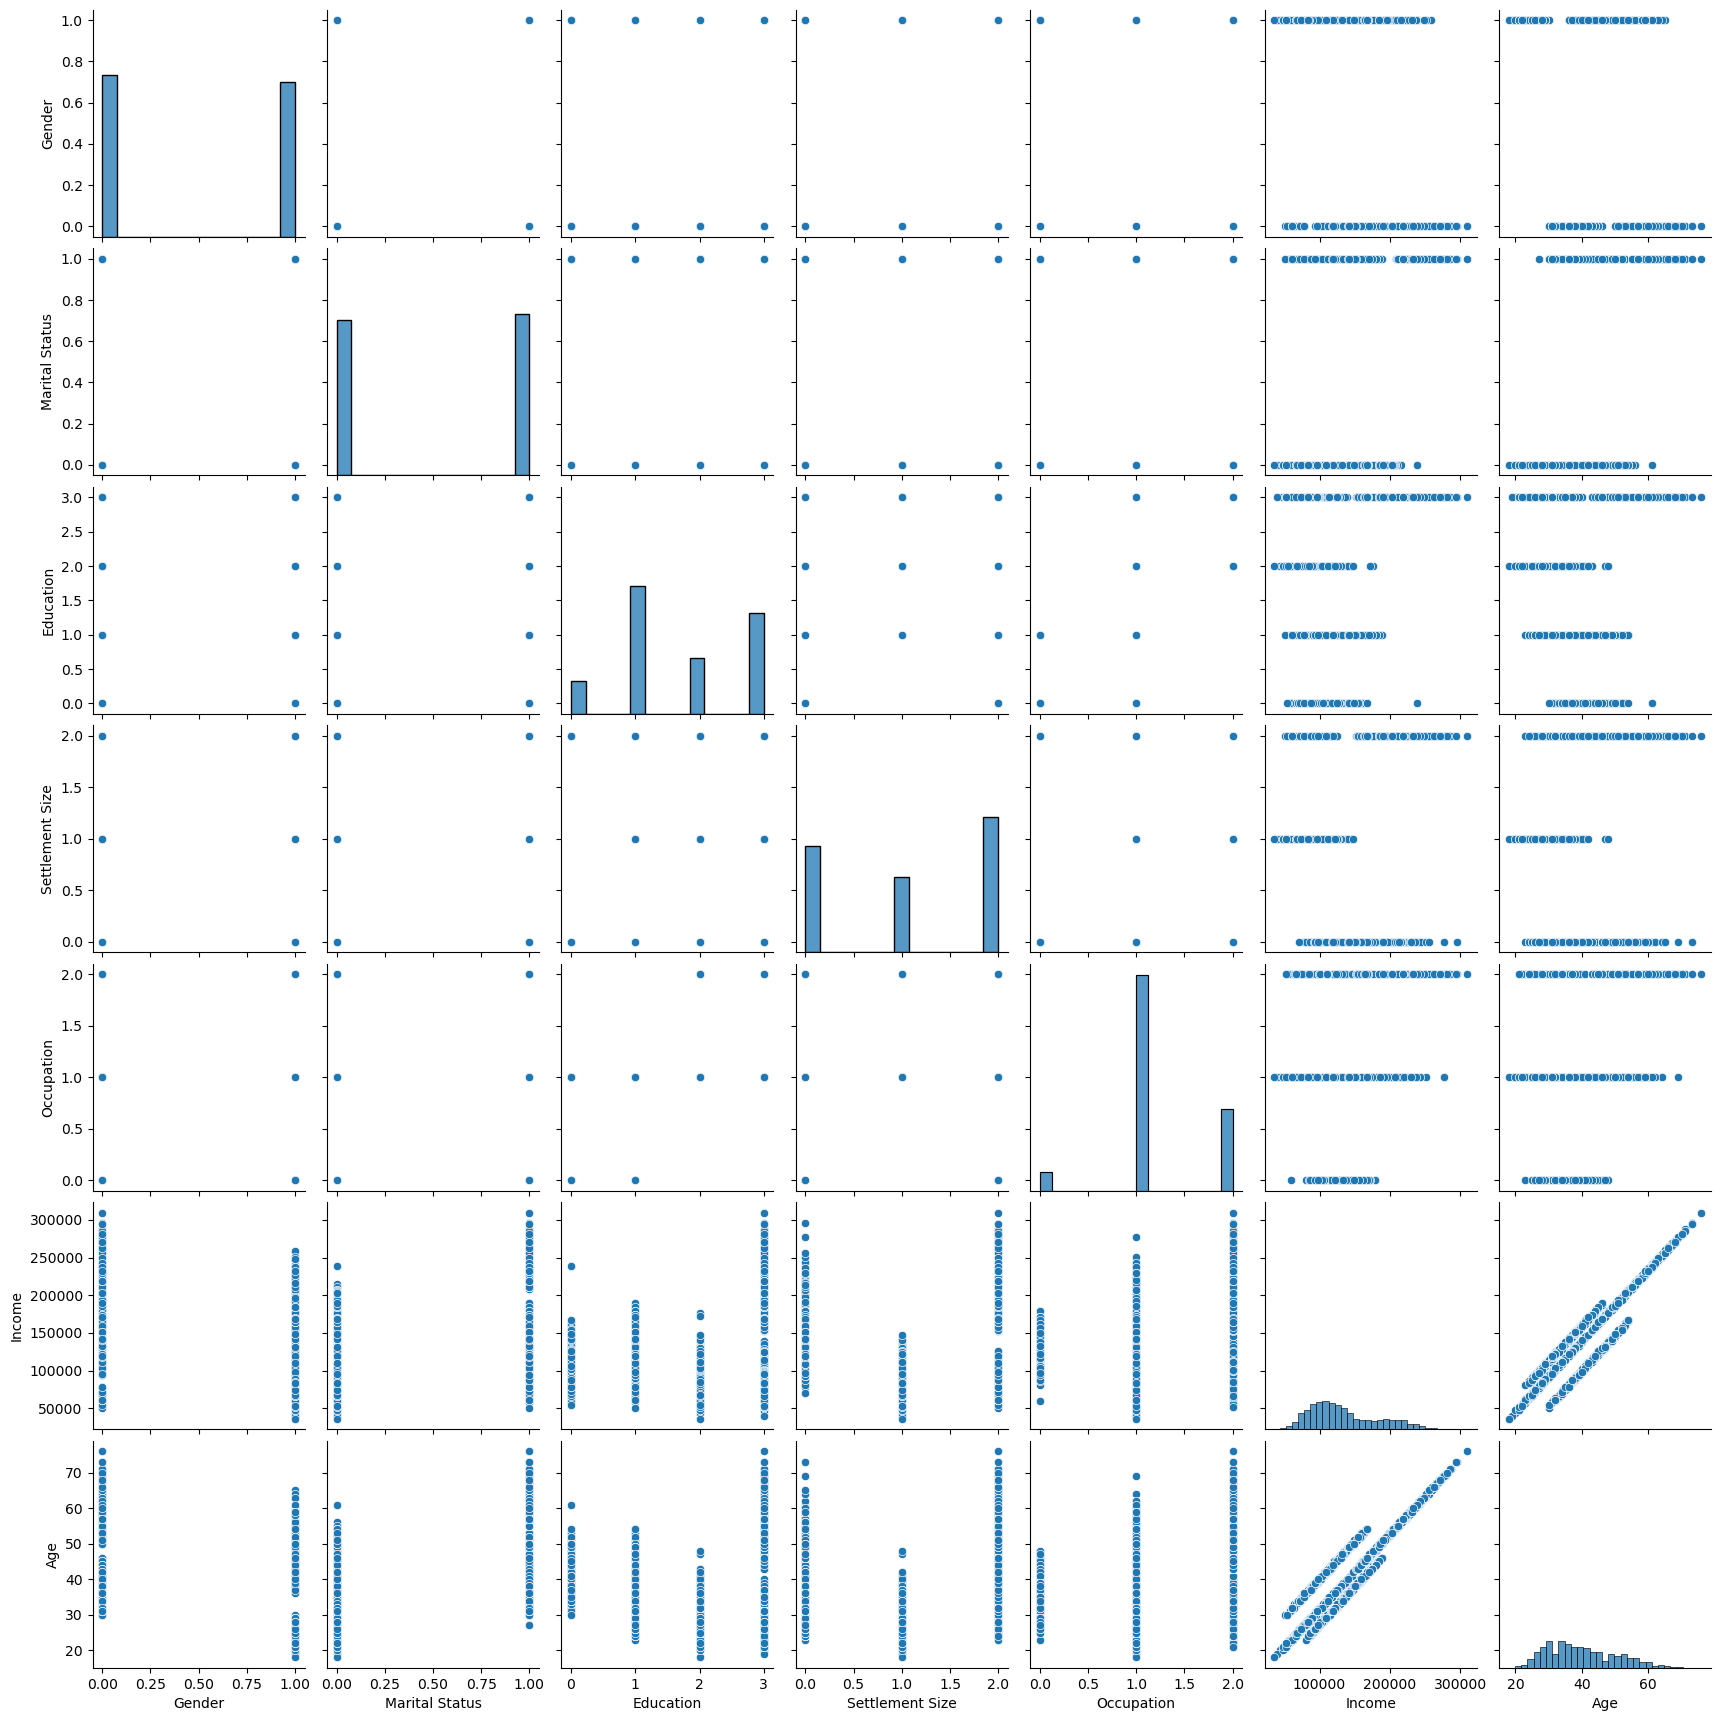

In [8]:
import matplotlib.pyplot as plt

import seaborn as sns

sns.pairplot(df)

plt.show()

In [9]:
df.corr().round(2)

,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age
Gender,1.00,-0.44,-0.18,0.24,-0.08,-0.44,-0.19
Marital Status,-0.44,1.00,-0.30,-0.23,-0.18,0.28,0.23
Education,-0.18,-0.30,1.00,0.33,0.64,0.47,0.31
Settlement Size,0.24,-0.23,0.33,1.00,0.47,0.17,0.41
Occupation,-0.08,-0.18,0.64,0.47,1.00,0.54,0.54
Income,-0.44,0.28,0.47,0.17,0.54,1.00,0.90
Age,-0.19,0.23,0.31,0.41,0.54,0.90,1.00


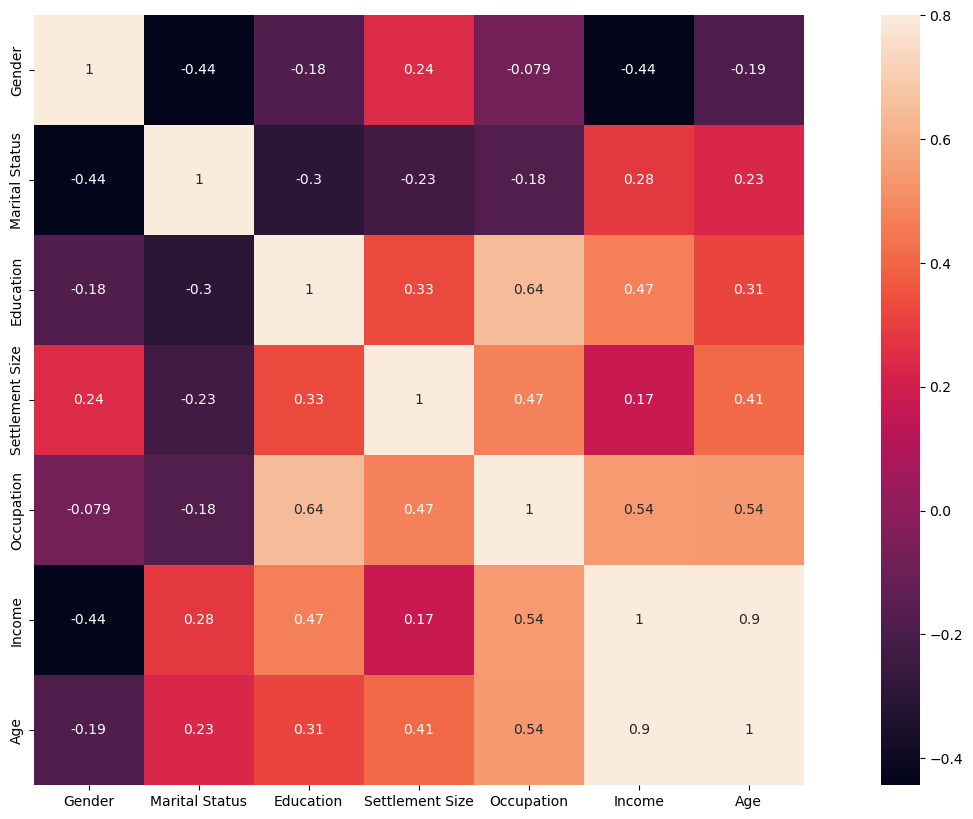

In [10]:
import seaborn as sns

corrmat = df.corr()
# print(corrmat.round(3).to_string())
# corrmat

f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True)
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

# Standardizing the numerical features
sc = StandardScaler()

df[['Income', 'Age']] = sc.fit_transform(df[['Income', 'Age']])

### Determine Optimal Number of Clusters (Elbow Method)

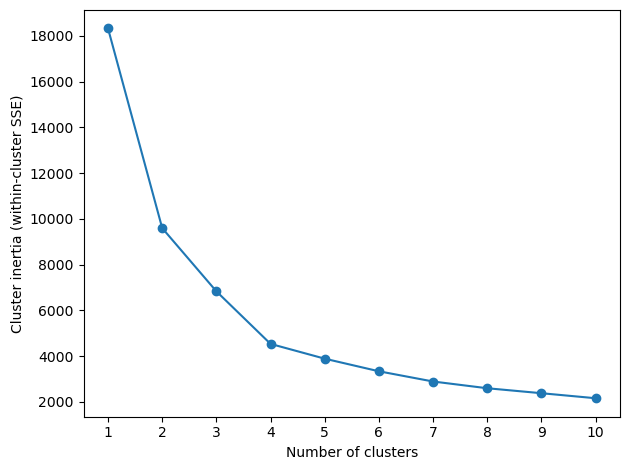

In [12]:
from sklearn.cluster import KMeans

#create a list to store inertia value for k
inertias = [] # empty list

#define x as value from df 
X = df.values

#for loop to fit KMeans model with 1-10 clutter size
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    inertias.append(km.inertia_)

#plot the elbow graph
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia (within-cluster SSE)')
plt.xticks(range(1,11))
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

In [13]:
df.head()

,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age
0,0,0,3,2,2,1.056251,0.979092
1,0,1,1,0,1,-0.403396,-0.968623
2,0,1,1,0,0,-0.032266,-0.579080
3,0,1,3,2,2,1.552052,1.466021
4,1,1,1,2,1,-0.324781,0.394778



### Silhouette Analysis for K-Means Clustering

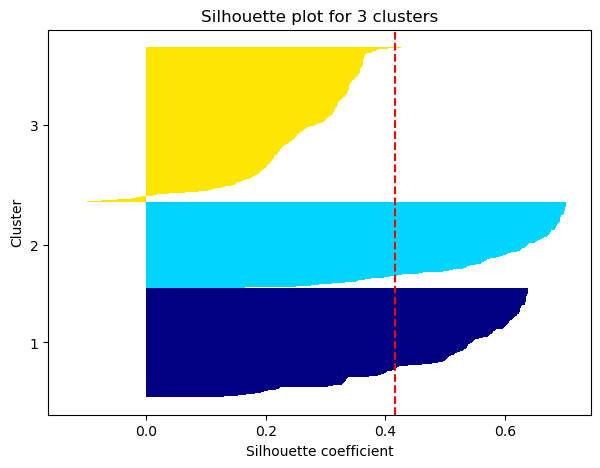

silhouette_avg for 3 clusters: 0.42


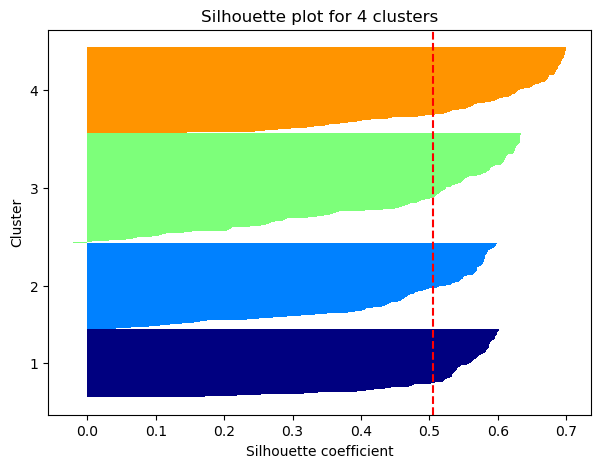

silhouette_avg for 4 clusters: 0.50


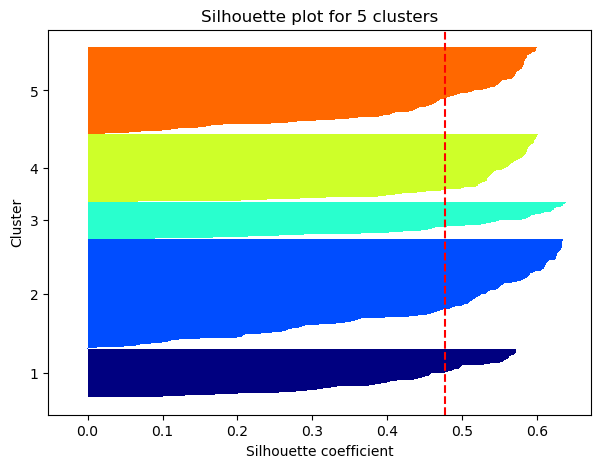

silhouette_avg for 5 clusters: 0.48


In [14]:


import numpy as np
from matplotlib import cm

from sklearn.metrics import silhouette_samples

def plot_silhouette(X, range_n_clusters=[3, 4, 5]):
    for n_clusters in range_n_clusters:
        km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=0)
        y_km = km.fit_predict(X)
        
        cluster_labels = np.unique(y_km)
        silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
        silhouette_avg = np.mean(silhouette_vals)  # Calculating the average silhouette score directly
        
        y_ax_lower, y_ax_upper = 0, 0
        yticks = []
        plt.figure(figsize=(7, 5))
        for i, c in enumerate(cluster_labels):
            c_silhouette_vals = silhouette_vals[y_km == c]
            c_silhouette_vals.sort()
            y_ax_upper += len(c_silhouette_vals)
            color = cm.jet(float(i) / len(cluster_labels))
            plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
            yticks.append((y_ax_lower + y_ax_upper) / 2.)
            y_ax_lower = y_ax_upper

        plt.axvline(silhouette_avg, color="red", linestyle="--")
        plt.yticks(yticks, cluster_labels + 1)
        plt.ylabel('Cluster')
        plt.xlabel('Silhouette coefficient')
        plt.title(f'Silhouette plot for {n_clusters} clusters')
        plt.show()
        print(f'silhouette_avg for {n_clusters} clusters: {silhouette_avg:.2f}')

plot_silhouette(X)


In [15]:
df.head()

,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age
0,0,0,3,2,2,1.056251,0.979092
1,0,1,1,0,1,-0.403396,-0.968623
2,0,1,1,0,0,-0.032266,-0.579080
3,0,1,3,2,2,1.552052,1.466021
4,1,1,1,2,1,-0.324781,0.394778


### Kmeans Clustering

In [16]:
# K-means++
n_clusters = 4

kmeans_plus = KMeans(n_clusters=n_clusters, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
y_km_plus = kmeans_plus.fit_predict(df)

print(y_km_plus)
print(f'\nClusters:\n {kmeans_plus.cluster_centers_}')

[3 2 2 ... 2 2 1]

Clusters:
 [[ 0.89793282  0.56847545  0.58914729  1.99870801  0.97674419 -0.6899887
   0.03090205]
 [ 0.63141994  0.13293051  2.27693857  1.02618328  1.16314199 -0.93016553
  -1.04227556]
 [ 0.26571201  0.82736675  0.9451074   0.01909308  0.83373111  0.01659906
  -0.26251829]
 [ 0.30942623  0.44057377  3.          1.81352459  1.88934426  1.47217276
   1.37402349]]


### Agglomerative Clustering

In [17]:
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=n_clusters, 
                                    linkage='complete',
                                    metric='euclidean')

labels = ac.fit_predict(X)
print(labels)


[0 1 1 ... 1 1 3]


In [18]:
df.head()

,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age
0,0,0,3,2,2,1.056251,0.979092
1,0,1,1,0,1,-0.403396,-0.968623
2,0,1,1,0,0,-0.032266,-0.579080
3,0,1,3,2,2,1.552052,1.466021
4,1,1,1,2,1,-0.324781,0.394778


### Display the cluster centers and counts

In [19]:
# Calculate mean values of features within each cluster for K-means
kmeans_profile = df.groupby(y_km_plus).mean()

# Calculate customer counts for each cluster
kmeans_counts = pd.Series(y_km_plus).value_counts().sort_index()

# Add customer counts to the profiles
kmeans_profile['Customer Count'] = kmeans_counts.values

# Round off the numerical values to 2 decimal places
kmeans_profile = kmeans_profile.round(2)

print("kmeans cluster centers and customer counts")
# Display the results
kmeans_profile

kmeans cluster centers and customer counts


,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age,Customer Count
0,0.90,0.57,0.59,2.00,0.98,-0.69,0.03,774
1,0.63,0.13,2.28,1.03,1.16,-0.93,-1.04,993
2,0.27,0.83,0.95,0.02,0.83,0.02,-0.26,1257
3,0.31,0.44,3.00,1.81,1.89,1.47,1.37,976


In [20]:
# Calculate mean values of features within each cluster for Agglomerative
agglomerative_profile = df.groupby(labels).mean()

# Calculate customer counts for each cluster
agglomerative_counts = pd.Series(labels).value_counts().sort_index()

# Add customer counts to the profiles
agglomerative_profile['Customer Count'] = agglomerative_counts.values

# Round off the numerical values to 2 decimal places
agglomerative_profile = agglomerative_profile.round(2)


print("agglomerative cluster centers and customer counts")
# Display the results
agglomerative_profile

agglomerative cluster centers and customer counts


,Gender,Marital Status,Education,Settlement Size,Occupation,Income,Age,Customer Count
0,0.64,0.16,2.29,1.26,1.61,0.80,0.94,788
1,0.45,0.75,0.82,0.86,0.87,-0.31,-0.29,1792
2,0.07,1.00,3.00,1.85,1.90,1.97,1.87,422
3,0.61,0.16,2.29,1.04,1.17,-0.91,-1.01,998


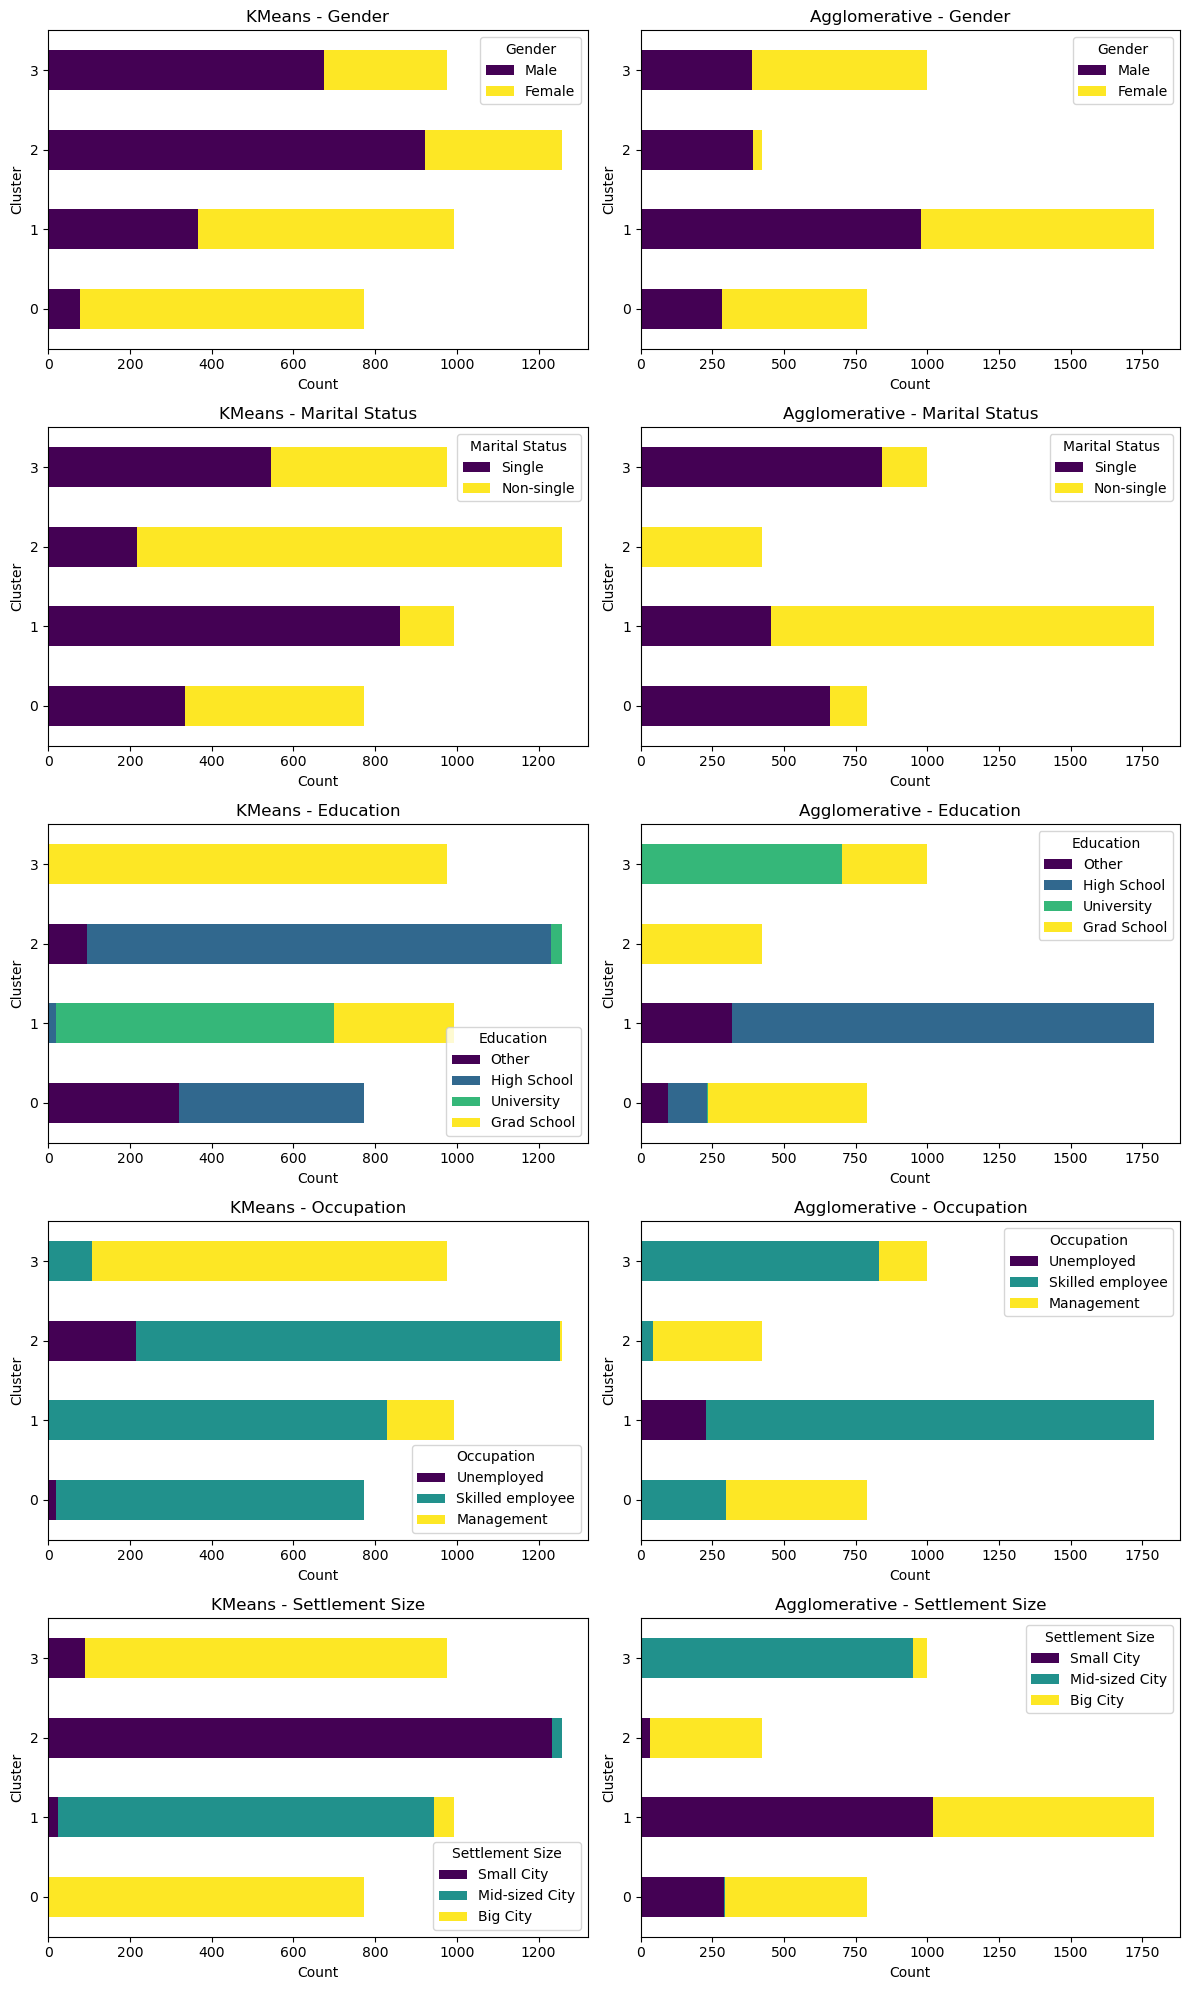

In [21]:
import matplotlib.pyplot as plt
import pandas as pd



df['KMeans_Cluster'] = y_km_plus
df['Agglo_Cluster'] = labels

# Define the categories and their human-readable labels
categories = {
    'Gender': {0: 'Male', 1: 'Female'},
    'Marital Status': {0: 'Single', 1: 'Non-single'},
    'Education': {0: 'Other', 1: 'High School', 2: 'University', 3: 'Grad School'},
    'Occupation': {0: 'Unemployed', 1: 'Skilled employee', 2: 'Management'},
    'Settlement Size': {0: 'Small City', 1: 'Mid-sized City', 2: 'Big City'}
}

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 20))  # Adjust size as needed
for idx, (category, mapping) in enumerate(categories.items()):
    # For KMeans Clusters
    crosstab_km = pd.crosstab(df['KMeans_Cluster'], df[category])
    crosstab_km.rename(columns=mapping, inplace=True)
    crosstab_km.plot(kind='barh', stacked=True, ax=axes[idx, 0], colormap='viridis', title=f'KMeans - {category}')
    axes[idx, 0].set_xlabel('Count')
    axes[idx, 0].set_ylabel('Cluster')
    
    # For Agglomerative Clusters
    crosstab_agg = pd.crosstab(df['Agglo_Cluster'], df[category])
    crosstab_agg.rename(columns=mapping, inplace=True)
    crosstab_agg.plot(kind='barh', stacked=True, ax=axes[idx, 1], colormap='viridis', title=f'Agglomerative - {category}')
    axes[idx, 1].set_xlabel('Count')
    axes[idx, 1].set_ylabel('Cluster')

# Adjust the layout
plt.tight_layout()
plt.show()

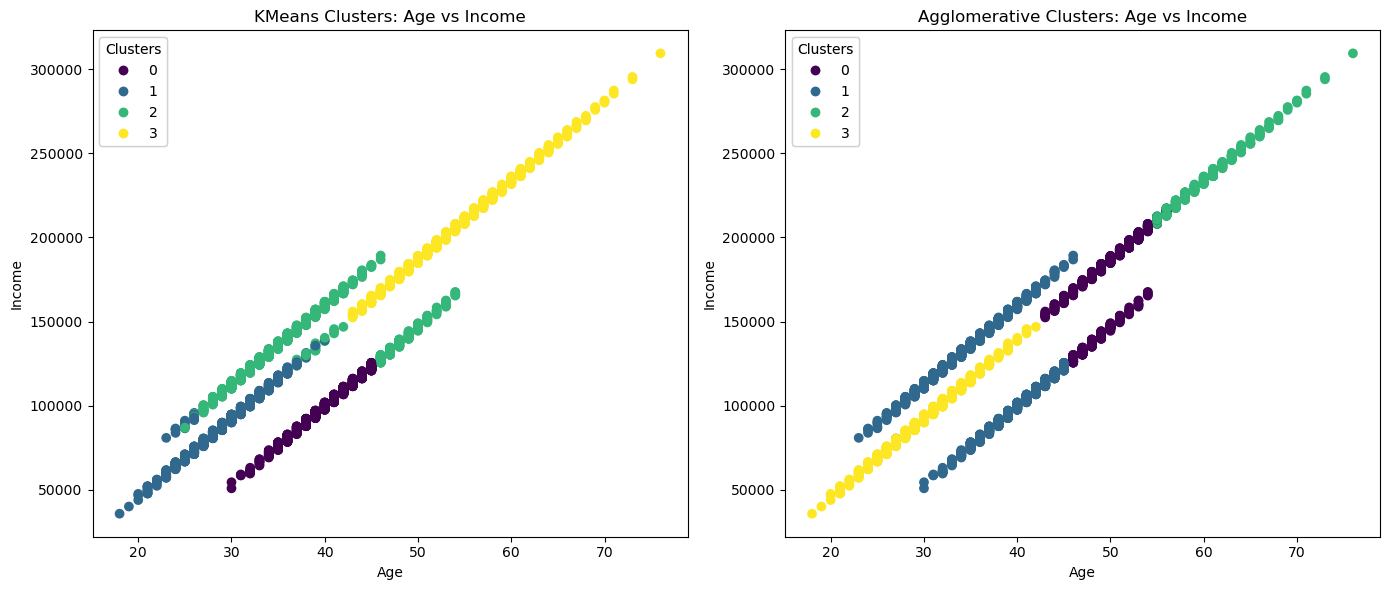

In [22]:
original_features = sc.inverse_transform(df[['Income', 'Age']])

# Update the DataFrame with the original values for plotting
df['Income_original'] = original_features[:, 0]
df['Age_original'] = original_features[:, 1]

# Adding cluster labels back to the dataframe (assuming they are not there)
df['KMeans_Cluster'] = y_km_plus
df['Agglo_Cluster'] = labels

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Scatter plot for K-means clusters
scatter = axes[0].scatter(df['Age_original'], df['Income_original'], c=df['KMeans_Cluster'], cmap='viridis')
axes[0].set_title('KMeans Clusters: Age vs Income')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Income')
legend1 = axes[0].legend(*scatter.legend_elements(), title="Clusters")
axes[0].add_artist(legend1)

# Scatter plot for Agglomerative clusters
scatter = axes[1].scatter(df['Age_original'], df['Income_original'], c=df['Agglo_Cluster'], cmap='viridis')
axes[1].set_title('Agglomerative Clusters: Age vs Income')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Income')
legend2 = axes[1].legend(*scatter.legend_elements(), title="Clusters")
axes[1].add_artist(legend2)

plt.tight_layout()
plt.show()